
<h2 align="center"> Sistema Fuzzy de Mamdani </h2>


A fim de realizar a implementação de um sistema fuzzy utilizando o método de inferência de mamdani, foram utilizadas as bibliotecas **NumPy**, **matplotlib** e **skfuzzy**.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

A função de pertinência utilizada foi a trapezoidal e foram também definidos os intervalos: 
- -10 $\leq x \leq$ 10, para os antecedentes; 
-   0 $\leq y \leq$ 10, para os consequentes; 

Sendo que, cada um dos intervalos definidos possui 100 pontos linearmente distribuídos. Para isso foi utilizada a função **linspace** da biblioteca **NumPy**.

In [2]:
def trapezoidal(i, a, m, n, b):
    y = list()
    for x in i:
        y.append(max(min((x - a)/(m - a), 1,(b - x)/(b - n)), 0))
    return y

x = np.linspace(-10, 10, 100, False)
y = np.linspace(0, 10, 100, False)

Os antecedentes utilizados foram:
- [-20, -15, -6, -3]
- [-6, -3, 3, 6]
- [3, 6, 15, 20]

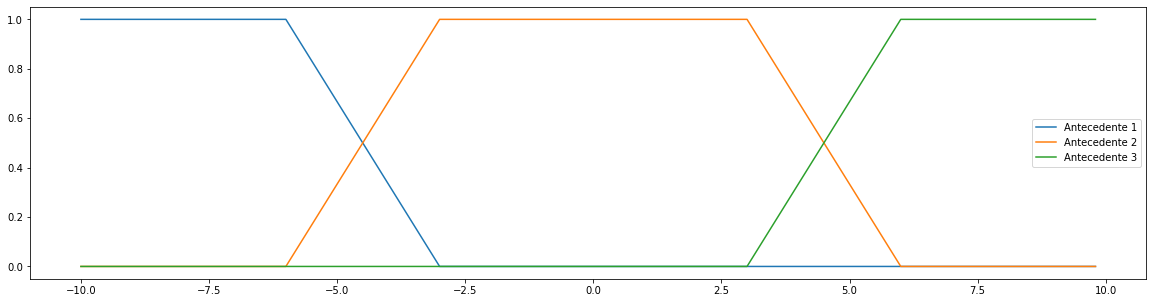

In [3]:
ante = list()
ante.append(trapezoidal(x, -20, -15, -6, -3))
ante.append(trapezoidal(x, -6, -3, 3, 6))
ante.append(trapezoidal(x, 3, 6, 15, 20))

plt.figure(1, figsize = ((20, 5)))
plt.plot(x, ante[0], label='Antecedente 1')
plt.plot(x, ante[1], label='Antecedente 2')
plt.plot(x, ante[2], label='Antecedente 3')
plt.legend(loc='center right')

Os consequentes utilizados foram:
- [-2.46, -1.46, 1.46, 2.46]
- [1.46, 2.46, 5, 7]
- [5, 7, 13, 15]

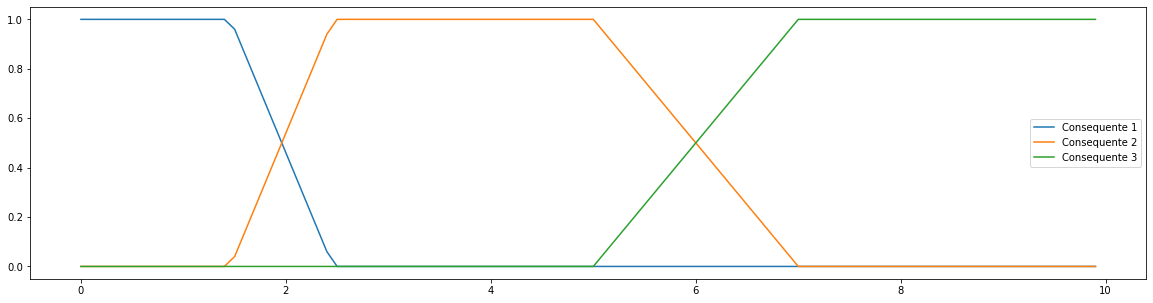

In [4]:
cons = list()
cons.append(trapezoidal(y, -2.46, -1.46, 1.46, 2.46))
cons.append(trapezoidal(y, 1.46, 2.46, 5, 7))
cons.append(trapezoidal(y, 5, 7, 13, 15))

plt.figure(2, figsize = ((20, 5)))
plt.plot(y, cons[0], label='Consequente 1')
plt.plot(y, cons[1], label='Consequente 2')
plt.plot(y, cons[2], label='Consequente 3')
plt.legend()

Foram utilizadas as seguites regras fuzzy na implementação:
- se $x$ é $A_1$, então $y$ é $B_3$.
- se $x$ é $A_2$, então $y$ é $B_2$.
- se $x$ é $A_3$, então $y$ é $B_1$.

Onde $A$ representa o antecedente e $B$ representa o consequente. O método de inferência de mamdani utiliza a inferência $min-max$, onde a conjunção dos antecedentes com os consequentes é realizada pelo mínimo e a agregação das regras é feita utilizando o máximo. Após a agregação das regras é necessária a realização da defuzzificação do conjunto de saídas, para isso foi utilizada a função **defuzz** da biblioteca **skfuzz**, e o método escolhido foi o 
máximo dos máximos.


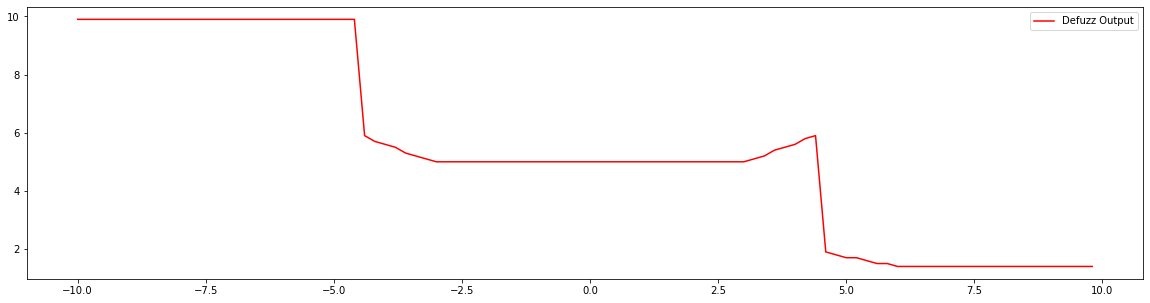

In [5]:
deff_out = list()

for i in range(len(x)):
    b1 = list()
    b2 = list() 
    b3 = list()
    out = list()
    
    for j in range(len(y)):
        b1.append(min(ante[0][i], cons[2][j]))            #conjunção 
        b2.append(min(ante[1][i], cons[1][j]))
        b3.append(min(ante[2][i], cons[0][j]))
        out.append(max(b1[j], b2[j], b3[j]))              #agregação
        
    deff_out.append(fuzz.defuzz(y, np.array(out), 'lom')) #defuzzificação

plt.figure(3, figsize = ((20, 5)))
plt.plot(x, deff_out, color='r', label='Defuzz Output')
plt.legend()
plt.show()